In [1]:
import pandas as pd
import numpy as np



In [2]:
df=pd.read_csv('E:\python practice\hate_speech_smalldataset.csv')

df.head(20)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [3]:
df.drop(columns=["Unnamed: 0","count","hate_speech","offensive_language","neither"],axis=1,inplace=True)


In [4]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df["class"].replace({2: 0}, inplace=True)

df.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
X=df['tweet']
Y=df['class']

In [7]:
from nltk.corpus import stopwords   #remove stopwords
from nltk.stem.porter import PorterStemmer   #stemming
import re
from gensim.models import Word2Vec   # word2vec method

In [8]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    tweets = re.sub('[^-A-Za-z]', ' ', df['tweet'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    
    tweets = [ps.stem(word) for word in tweets if not word in stopwords.words('english')]
    tweets = ' '.join(tweets)
    corpus.append(tweets) 


In [9]:
len(corpus),len(Y)


(4002, 4002)

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.40)


In [11]:
len(xtrain),len(ytrain),len(xtest),len(ytest)

(2401, 2401, 1601, 1601)

In [12]:
%%time
documents=[tweets.split() for tweet in xtrain]
#print(documents)

Wall time: 8 ms


In [13]:
len(documents)

2401

In [14]:
import gensim
print(gensim.__version__)

w2v_model = gensim.models.Word2Vec(size=300,window=3, min_count=5,workers=8)
print(Word2Vec)

3.8.1
<class 'gensim.models.word2vec.Word2Vec'>


In [15]:
w2v_model

In [16]:
w2v_model.build_vocab(documents)
# Build vocabulary from a dictionary of word frequencies.


In [17]:
words = w2v_model.wv.vocab.keys()
print(words)
vocab_size = len(words)
print(vocab_size)

dict_keys(['ragingbab', 'tri', 'critic', 'jr', 'liter', 'look', 'like', 'ate', 'pot', 'browni', 'got', 'couch', 'put', 'glove'])
14


In [18]:
w2v_model.train(documents,total_examples=len(documents),epochs=32)

(142404, 1075648)

In [19]:
w2v_model.most_similar("look")

C:\Users\Amjad Net Cafe\.conda\envs\myEnv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('glove', 0.20384159684181213),
 ('put', 0.11319621652364731),
 ('couch', 0.1063983291387558),
 ('critic', 0.07940470427274704),
 ('browni', 0.07005926966667175),
 ('ragingbab', 0.058075834065675735),
 ('tri', 0.04727477207779884),
 ('jr', 0.014175668358802795),
 ('got', 0.013836562633514404),
 ('pot', -0.02112412452697754)]

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()


In [21]:
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 8141


In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(tokenizer.texts_to_sequences(xtrain), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(xtest), maxlen=300)

In [23]:
x_train

array([[   0,    0,    0, ...,  118,  108,  322],
       [   0,    0,    0, ...,  223,   19,   23],
       [   0,    0,    0, ...,    5,   98,  304],
       ...,
       [   0,    0,    0, ...,    2, 1522, 8139],
       [   0,    0,    0, ...,   16,    4,   21],
       [   0,    0,    0, ...,  502,  288,  127]])

In [24]:
x_test

array([[   0,    0,    0, ...,    8,    8,    8],
       [   0,    0,    0, ...,   18,  417,   34],
       [   0,    0,    0, ...,    4,  194, 5274],
       ...,
       [   0,    0,    0, ...,   49,    1,   88],
       [   0,    0,    0, ...,    9,    4,  191],
       [   0,    0,    0, ...,   97, 7653, 7264]])

In [25]:
# Build Embedding Layer
embedding_matrix = np.zeros((vocab_size, 300))
print(embedding_matrix)
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8141, 300)


In [26]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# Build The model
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [29]:
embedding_layer

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          2442300   
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 2,535,805
Trainable params: 93,505
Non-trainable params: 2,442,300
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [33]:
history = model.fit(x_train, ytrain,
                    batch_size=32,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
68/68 [==============================] - 65s 951ms/step - loss: 0.5815 - accuracy: 0.7593 - val_loss: 0.5670 - val_accuracy: 0.7427
Epoch 2/8
68/68 [==============================] - 65s 963ms/step - loss: 0.5400 - accuracy: 0.7685 - val_loss: 0.5751 - val_accuracy: 0.7427
Epoch 3/8
68/68 [==============================] - 63s 922ms/step - loss: 0.5449 - accuracy: 0.7685 - val_loss: 0.5654 - val_accuracy: 0.7427
Epoch 4/8
68/68 [==============================] - 64s 937ms/step - loss: 0.5407 - accuracy: 0.7685 - val_loss: 0.5661 - val_accuracy: 0.7427
Epoch 5/8
68/68 [==============================] - 62s 916ms/step - loss: 0.5404 - accuracy: 0.7685 - val_loss: 0.5761 - val_accuracy: 0.7427
Epoch 6/8
68/68 [==============================] - 64s 942ms/step - loss: 0.5417 - accuracy: 0.7685 - val_loss: 0.5655 - val_accuracy: 0.7427
Epoch 7/8
68/68 [==============================] - 81s 1s/step - loss: 0.5413 - accuracy: 0.7685 - val_loss: 0.5686 - val_accuracy: 0.7427
Epoch 8/8

In [34]:
%%time
score = model.evaluate(x_test, ytest, batch_size=32)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

51/51 [==============================] - 8s 151ms/step - loss: 0.5417 - accuracy: 0.7664

ACCURACY: 0.7663959860801697
LOSS: 0.5416651964187622
Wall time: 8.16 s


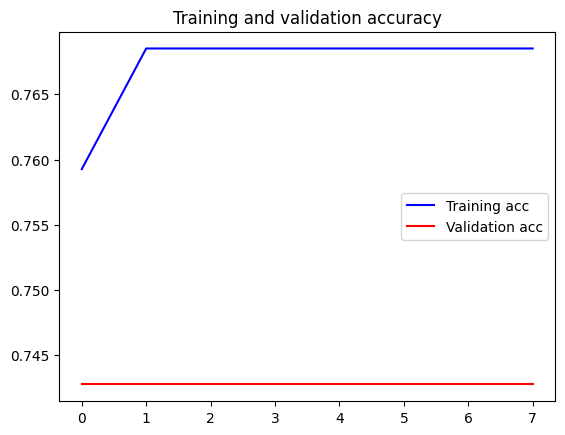

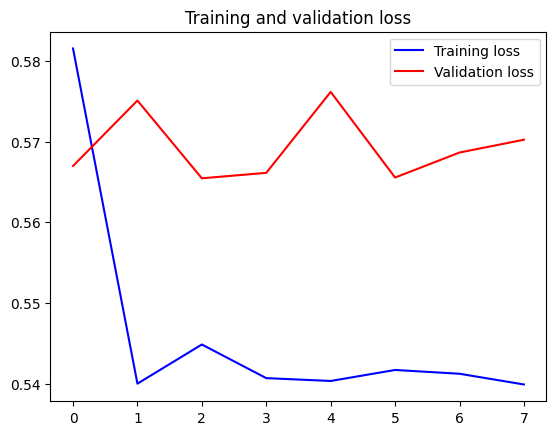

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()